<a href="https://colab.research.google.com/github/Mahirtayeb1/intro_to_tensorflow.ai-ml-dp/blob/master/Hand_Written_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Hand Written Digit Recognition using Machine Learning Techniques**

Importing Libraries


In [ ]:
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn import datasets
import numpy as np
import pandas as pd
import random
from keras.datasets import mnist
from keras.models import Sequential                       # Model type to be used
from keras.layers.core import Dense, Dropout, Activation  # Types of layers to be used in our model
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D 
from keras.utils import np_utils                          # NumPy related tools

**MNIST Hand Written Digit Recognition using CNN**

Loading "MNIST Dataset"


In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# showing the shape of training and test data
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)


11490434/11490434 [==============================] - 0s 0us/step
X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


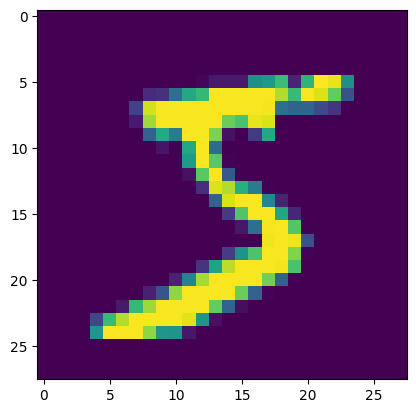

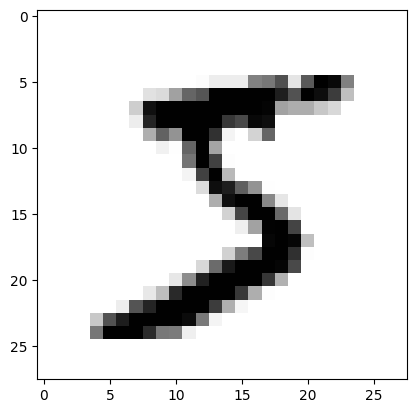

In [ ]:
# checking the graph how the data looks like..
plt.imshow(X_train[0])  
plt.show()
# as we dont know the data is colored image or a binary image
# thats why to plot we r changing the configuration
plt.imshow(X_train[0], cmap = plt.cm.binary)

** Checking values of each pixels before Normalization ** 

In [ ]:
print(X_train[0])  # 0=black and digits=white. So background is black. For using binary img is showing invertedly.

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

Text(0.5, 0, 'Intensity')

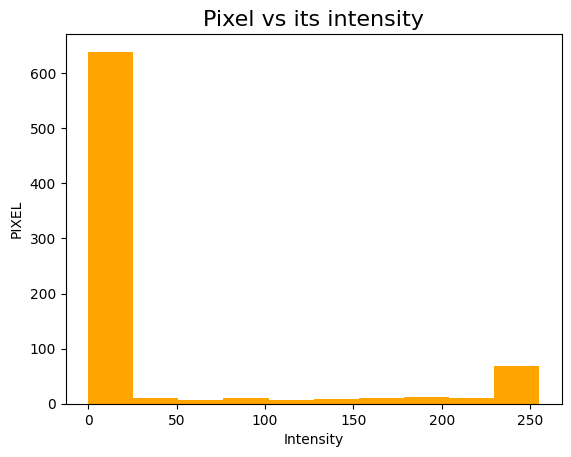

In [ ]:
plt.hist(X_train[0].reshape(784),facecolor='orange')
plt.title('Pixel vs its intensity',fontsize=16)
plt.ylabel('PIXEL')
plt.xlabel('Intensity')


 **Pre Processing the Data**

**Normalizing the Data**

Normalization is very important because if the color changes we do not need to care about that.

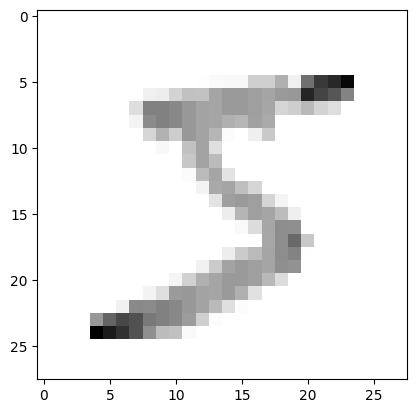

In [ ]:
X_train = tf.keras.utils.normalize(X_train, axis = 1)
X_test = tf.keras.utils.normalize(X_test, axis = 1)
plt.imshow(X_train[0], cmap = plt.cm.binary)

**After Normalization**

In [ ]:
print(X_train[0])   # all values will be between 0-1. bcz values were divided by 255

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Text(0.5, 0, 'Intensity')

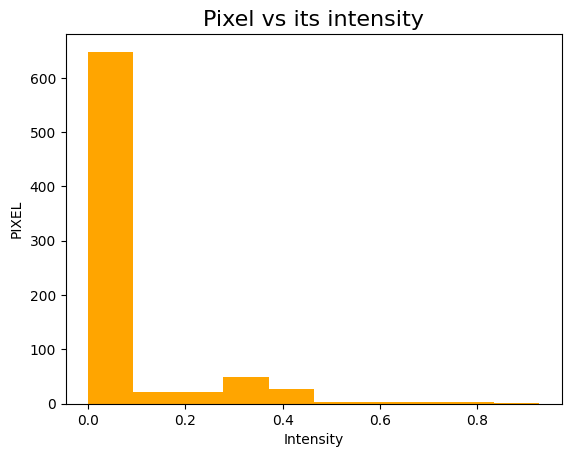

In [ ]:
plt.hist(X_train[0].reshape(784),facecolor='orange')
plt.title('Pixel vs its intensity',fontsize=16)
plt.ylabel('PIXEL')
plt.xlabel('Intensity')

In [ ]:
print(y_train[0])  # checking that we have labels inside our network

5


In [ ]:
print(X_train[1])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
print(y_train[1])

0


**Model Training & Testing:  CNN**

**Resizing image to make it suitable for applying convolution operation**

Since neural networks receive inputs of the same size, all images need to be resized to a fixed size before inputting them to the CNN. The larger the fixed size, the less shrinking required. Less shrinking means less deformation of features and patterns inside the image

In [ ]:
IMG_SIZE = 28
x_trainr = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)  # increasing 1 dimention for kernel operation
x_testr = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)   # increasing 1 dimention for kernel operation

print("Training samples dimentions", x_trainr.shape)
print("Testing samples dimentions", x_testr.shape)

Training samples dimentions (60000, 28, 28, 1)
Testing samples dimentions (10000, 28, 28, 1)


**Creating Deep Neural Network**

Training on 60,000 samples of MNIST handwritten dataset

In [ ]:
# creating neural network

model = Sequential()

# First convolutional layer   # 0 1 2 3   (60000,28,28,1)  28-3+1 = 26x26
model.add(Conv2D(64, (3, 3), input_shape = x_trainr.shape[1:])) # only for 1st convolution layer to mention input layer size
model.add(Activation("relu")) # activation func to make it non linear, <0, remove, >0
model.add(MaxPooling2D(pool_size= (2, 2)))  # maxpooling single maximum value of 2x2

# Second convolutional layer   13-3+1 = 11x11
model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size= (2, 2)))

# Third convolutional layer  
model.add(Conv2D(64, (3, 3))) 
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size= (2, 2)))

# Fully connected layer1  
model.add(Flatten())  # before using fully connected layer, need to flatten so that 2D to 1D
model.add(Dense(64))
model.add(Activation("relu"))

# Fully connected layer2   
model.add(Dense(32))
model.add(Activation("relu"))

# Last fully connected layer,  output must be equal to num of classes,  10  (0-9)
model.add(Dense(10))  # last dense layer must be 10
model.add(Activation("softmax")) # activation func is changed to softmax(class probabilities), if dense(1) it would be sigmoid


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [ ]:
print("Total Training Samples:", len(x_trainr))

Total Training Samples: 60000


In [ ]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [ ]:
# training my model
model.fit(x_trainr, y_train, epochs = 5, validation_split = 0.3)  # here 70% training of 60,000 data and 30% validating and validating acc need to be closer to acc but if val_acc=30 < acc=98. It is overfitting.

Epoch 1/5
1313/1313 [==============================] - 89s 67ms/step - loss: 0.3380 - accuracy: 0.8925 - val_loss: 0.1515 - val_accuracy: 0.9529
Epoch 2/5
1313/1313 [==============================] - 84s 64ms/step - loss: 0.1105 - accuracy: 0.9662 - val_loss: 0.0953 - val_accuracy: 0.9703
Epoch 3/5
1313/1313 [==============================] - 85s 65ms/step - loss: 0.0769 - accuracy: 0.9769 - val_loss: 0.0946 - val_accuracy: 0.9726
Epoch 4/5
1313/1313 [==============================] - 86s 65ms/step - loss: 0.0608 - accuracy: 0.9814 - val_loss: 0.0757 - val_accuracy: 0.9772
Epoch 5/5
1313/1313 [==============================] - 83s 63ms/step - loss: 0.0512 - accuracy: 0.9834 - val_loss: 0.0680 - val_accuracy: 0.9793


In [ ]:
# evaluating on testing dataset MNIST
test_loss, test_acc = model.evaluate(x_testr, y_test)
print("test loss on 10,000 test samples", test_loss)
print("validation accuracy on 10,000 test samples", test_acc)

313/313 [==============================] - 5s 17ms/step - loss: 0.0643 - accuracy: 0.9805
test loss on 10,000 test samples 0.0642915740609169
validation accuracy on 10,000 test samples 0.9804999828338623


**Accuracy of CNN Model**

In [ ]:
print(f'Accuracy: {test_acc*100}')

Accuracy: 98.04999828338623


In [ ]:
predictions = model.predict(x_testr)

313/313 [==============================] - 7s 23ms/step


In [ ]:
print(predictions)

[[3.99090396e-07 5.88447147e-05 8.41829518e-04 ... 9.99044478e-01
  1.45417005e-07 4.84408702e-05]
 [3.59641090e-05 7.49637763e-07 9.99962032e-01 ... 6.57461101e-07
  1.16901525e-07 1.45158179e-08]
 [3.12434395e-07 9.99987662e-01 3.31805222e-06 ... 3.44617683e-06
  1.52243922e-06 6.27694817e-07]
 ...
 [3.58469492e-07 8.42257214e-06 4.37184462e-06 ... 1.32440648e-04
  3.03432125e-06 6.14205783e-05]
 [7.25306862e-04 4.50810006e-07 1.87350068e-07 ... 8.54166865e-06
  6.04971137e-04 7.77522382e-06]
 [3.75753618e-04 1.68214717e-06 2.14331249e-05 ... 9.44944418e-07
  3.31669726e-05 2.53075323e-05]]


In [ ]:
# in order to understand, we need to convert predictions from one hot encoding
print(np.argmax(predictions[0]))

7


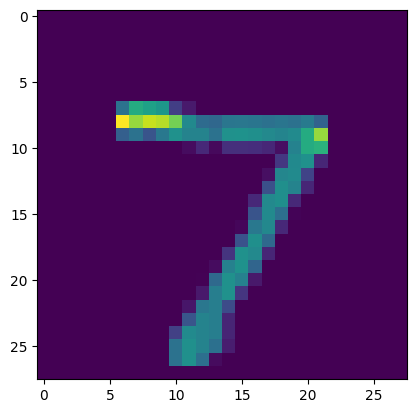

In [ ]:
#  checking the result is true or not
plt.imshow(X_test[0])

8


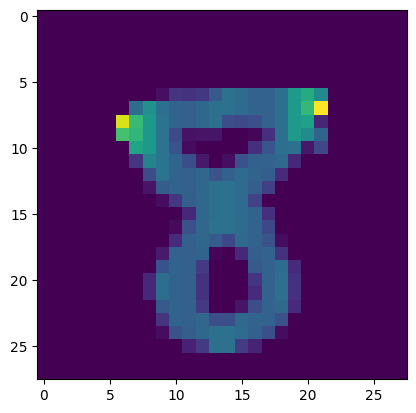

In [ ]:
print(np.argmax(predictions[128]))
plt.imshow(X_test[128])

#**Mnist Hand Written Digit Recognition using KNN**

Loading Dataset

In [ ]:
digits = datasets.load_digits()


In [ ]:
X = digits.data
y = digits.target

In [ ]:
df = pd.DataFrame(data = y, columns = ['targets'])
df

,targets
0,0
1,1
2,2
3,3
4,4
...,...
1792,9
1793,0
1794,8
1795,9


In [ ]:
X.shape

(1797, 64)

In [ ]:
y.shape

(1797,)

Visualizing the Data

In [ ]:
digits.images.shape

(1797, 8, 8)

In [ ]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

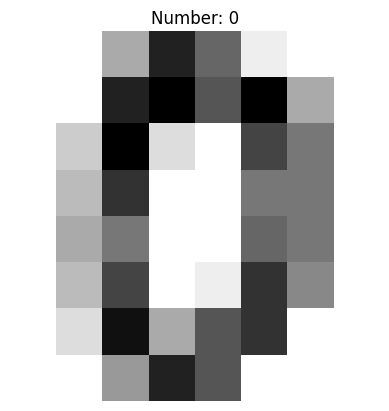

In [ ]:
plt.imshow(digits.images[0], cmap = plt.cm.gray_r)
plt.axis('off')
plt.title('Number: '+ str(y[0]))
None

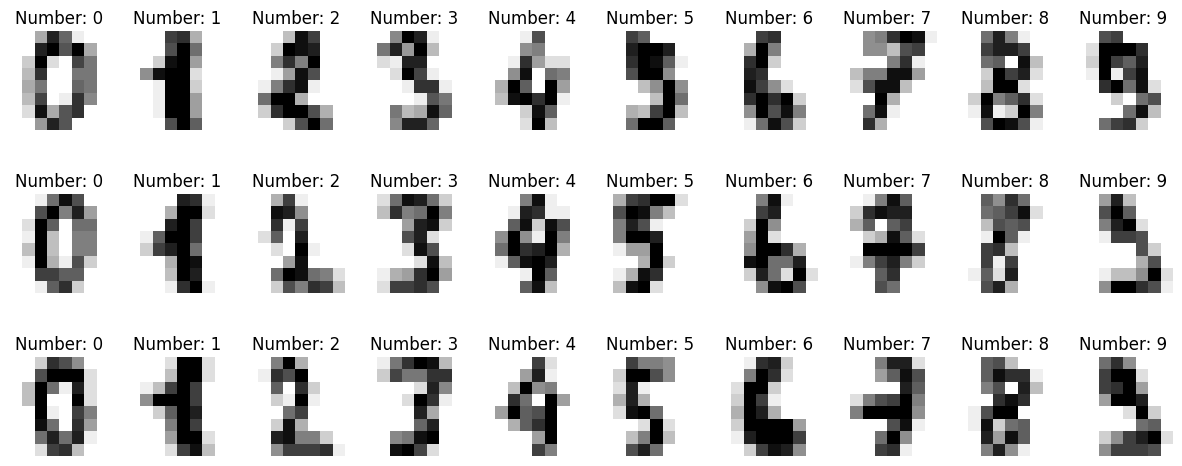

In [ ]:
# generating 30 images
figure, axes = plt.subplots(3, 10, figsize = (15,6))
for ax,image,number in zip(axes.ravel(), digits.images, y):
  ax.axis('off')
  ax.imshow(image, cmap = plt.cm.gray_r)
  ax.set_title('Number: '+ str(number))



**Data Preprocessing**

In [ ]:
# Flattening numpy arrays

image = digits.images[0]
print('original image data =')
print(image)
print()

image_flattened = image.ravel()  # flatten the data by reading the array row by row
print('Flattened image =')
print(image_flattened)
print()

print('Feature data for a smaple= ')
print(X[0])
print()

print('Feature data for all smaples is a 8-by-8 2D array= ')
print(X)




original image data =
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]

Flattened image =
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]

Feature data for a smaple= 
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]

Feature data for all smaples is a 8-by-8 2D array= 
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0

**Dataset Spliting**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state= 99, stratify= y)

In [ ]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(540,)

#**Model Training & Testing: KNN**

Training the model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Making predictions in the test dataset

In [ ]:
y_pred = knn.predict(X_test)
y_pred

array([9, 9, 1, 4, 1, 9, 8, 3, 0, 6, 4, 9, 2, 2, 3, 3, 8, 3, 1, 7, 9, 8,
       6, 5, 5, 1, 0, 2, 6, 4, 0, 3, 0, 2, 8, 2, 8, 9, 7, 1, 7, 4, 6, 3,
       2, 4, 8, 9, 3, 0, 2, 2, 3, 5, 7, 5, 4, 5, 8, 3, 7, 6, 0, 6, 3, 5,
       9, 5, 2, 2, 4, 9, 3, 6, 0, 5, 7, 6, 8, 4, 9, 3, 9, 7, 0, 6, 7, 2,
       0, 9, 7, 8, 9, 7, 1, 4, 1, 4, 5, 2, 9, 3, 8, 0, 0, 9, 0, 3, 4, 7,
       3, 3, 8, 8, 1, 7, 6, 2, 1, 6, 3, 5, 9, 0, 7, 0, 9, 8, 5, 2, 5, 5,
       3, 8, 0, 7, 8, 0, 3, 2, 7, 1, 3, 0, 0, 0, 0, 5, 9, 7, 3, 9, 7, 1,
       5, 7, 7, 9, 4, 8, 0, 7, 5, 2, 1, 6, 0, 3, 4, 5, 1, 9, 4, 6, 0, 8,
       2, 1, 3, 6, 6, 4, 8, 7, 2, 4, 4, 0, 7, 9, 4, 1, 5, 3, 7, 2, 7, 5,
       0, 2, 0, 6, 1, 1, 1, 1, 2, 7, 8, 8, 5, 9, 6, 5, 6, 0, 5, 9, 1, 3,
       4, 7, 0, 1, 1, 7, 3, 4, 4, 6, 7, 9, 8, 1, 5, 0, 5, 7, 9, 8, 1, 3,
       8, 3, 1, 2, 3, 1, 1, 2, 9, 9, 8, 3, 6, 5, 6, 2, 1, 7, 4, 2, 5, 4,
       8, 5, 0, 9, 8, 9, 8, 0, 8, 2, 1, 6, 1, 6, 6, 2, 4, 0, 0, 4, 2, 4,
       9, 0, 5, 7, 1, 3, 3, 8, 5, 1, 4, 0, 8, 1, 8,

**Evaluating the results by Generating a Classification Report**

It calculates various performance measure

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.95      0.98      0.96        55
           2       1.00      1.00      1.00        53
           3       1.00      0.98      0.99        55
           4       1.00      0.98      0.99        54
           5       0.96      0.98      0.97        55
           6       1.00      1.00      1.00        54
           7       0.98      1.00      0.99        54
           8       1.00      0.94      0.97        52
           9       0.96      0.98      0.97        54

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



Precision: total number of correct predictions for a given digit divided by total number of predicitons for that digit.


Recall: total number of correct predictions for a given digit divided by total number of samples that should have been predicted as that digit.

**Confusion Matrix for KNN**

In [ ]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_true = y_test, y_pred = y_pred)
confusion

array([[54,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 54,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0, 53,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 54,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 53,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 54,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 54,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 54,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0, 49,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 53]])

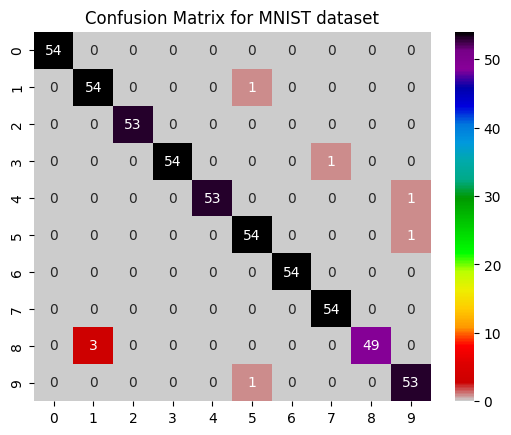

In [ ]:
import seaborn as sns
s = sns.heatmap(confusion, annot = True, cmap = 'nipy_spectral_r')
s.set_title('Confusion Matrix for MNIST dataset')
None

We can visualize in the heatmap that there are numbers which seemed to be mis_classified

**Accuracy of Dataset Using KNN Classifier**

In [ ]:
acc = knn.score(X_test, y_test)
print(f'accuracy = {acc}')

accuracy = 0.9851851851851852


#**Model Training & Testing: Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

Training the model

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dt.predict(X_test)
y_pred

array([9, 9, 1, 4, 1, 9, 3, 3, 0, 4, 1, 9, 2, 8, 3, 3, 8, 3, 1, 7, 9, 2,
       6, 5, 5, 1, 0, 2, 0, 4, 0, 3, 0, 2, 8, 2, 8, 9, 7, 1, 7, 4, 6, 3,
       2, 4, 8, 9, 8, 0, 2, 2, 2, 5, 7, 8, 4, 5, 1, 8, 1, 6, 0, 6, 3, 5,
       9, 5, 2, 8, 4, 9, 3, 6, 0, 5, 7, 6, 8, 4, 9, 8, 9, 7, 0, 6, 7, 2,
       0, 9, 7, 8, 9, 7, 1, 0, 1, 4, 5, 2, 9, 3, 8, 0, 0, 9, 0, 4, 4, 7,
       9, 2, 8, 3, 9, 7, 6, 2, 8, 6, 4, 5, 8, 0, 7, 0, 9, 2, 5, 2, 9, 5,
       3, 8, 0, 7, 8, 0, 3, 2, 7, 1, 3, 0, 0, 0, 0, 5, 9, 7, 3, 9, 7, 1,
       5, 7, 7, 9, 4, 8, 0, 7, 5, 2, 4, 6, 0, 3, 4, 5, 3, 9, 4, 6, 0, 8,
       2, 8, 3, 6, 6, 4, 5, 7, 2, 4, 4, 0, 7, 7, 4, 1, 5, 9, 7, 2, 7, 5,
       0, 6, 8, 6, 1, 1, 1, 1, 2, 1, 8, 4, 5, 9, 6, 5, 6, 0, 5, 9, 1, 8,
       4, 7, 0, 1, 4, 7, 3, 4, 4, 6, 7, 9, 9, 1, 5, 0, 5, 7, 9, 8, 1, 3,
       8, 3, 1, 2, 6, 1, 1, 2, 9, 9, 9, 3, 6, 5, 6, 8, 1, 7, 4, 2, 4, 4,
       7, 5, 0, 9, 8, 9, 8, 0, 3, 2, 1, 6, 1, 6, 6, 2, 7, 0, 0, 4, 2, 8,
       7, 0, 5, 7, 1, 3, 3, 9, 5, 8, 4, 0, 8, 1, 8,

**Accuracy of dataset using Decision Tree Classifier**

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = dt.predict(X_test)

In [ ]:
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.85


**Evaluating the results by Generating a Classification Report**

It calculates different performance measures

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        54
           1       0.83      0.82      0.83        55
           2       0.88      0.87      0.88        53
           3       0.88      0.65      0.75        55
           4       0.86      0.91      0.88        54
           5       0.93      0.91      0.92        55
           6       0.94      0.93      0.93        54
           7       0.89      0.93      0.91        54
           8       0.59      0.65      0.62        52
           9       0.79      0.85      0.82        54

    accuracy                           0.85       540
   macro avg       0.85      0.85      0.85       540
weighted avg       0.85      0.85      0.85       540



**Confusion Matrix for Decision Tree Classifier**

In [ ]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_true = y_test, y_pred = y_pred)
confusion

array([[53,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0, 45,  0,  1,  2,  1,  0,  0,  4,  2],
       [ 1,  0, 46,  0,  0,  0,  1,  0,  5,  0],
       [ 0,  2,  3, 36,  2,  0,  2,  0,  6,  4],
       [ 1,  1,  0,  0, 49,  0,  0,  1,  2,  0],
       [ 0,  0,  0,  0,  1, 50,  0,  0,  3,  1],
       [ 1,  0,  0,  0,  1,  0, 50,  2,  0,  0],
       [ 1,  2,  0,  0,  1,  0,  0, 50,  0,  0],
       [ 0,  3,  3,  3,  1,  2,  0,  1, 34,  5],
       [ 0,  1,  0,  1,  0,  1,  0,  2,  3, 46]])

**Visualizing the Heatmap of Decision Tree Classifier**

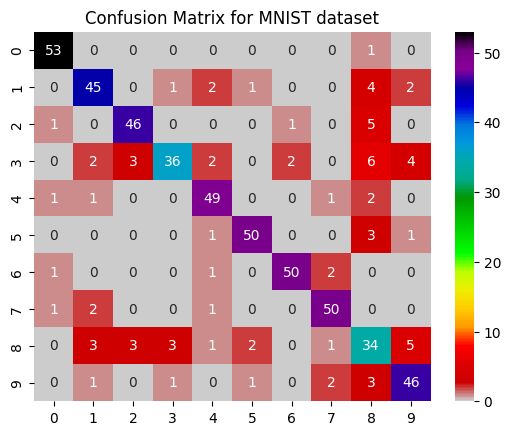

In [ ]:
import seaborn as sns
s = sns.heatmap(confusion, annot = True, cmap = 'nipy_spectral_r')
s.set_title('Confusion Matrix for MNIST dataset')
None

#**Result Visualization**

In [ ]:
data = {'Model':['CNN','KNN', 'Decision Tree Classifier'],
        'Accuracy':[0.9803, 0.98518, 0.85]}
df = pd.DataFrame(data) 
df

,Model,Accuracy
0,CNN,0.98030
1,KNN,0.98518
2,Decision Tree Classifier,0.85000


<Axes: >

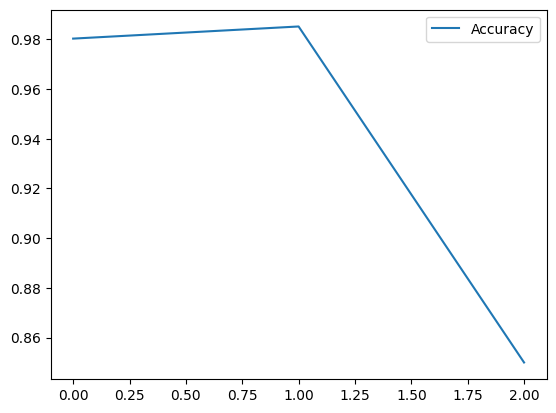

In [ ]:
df.plot()

<Axes: >

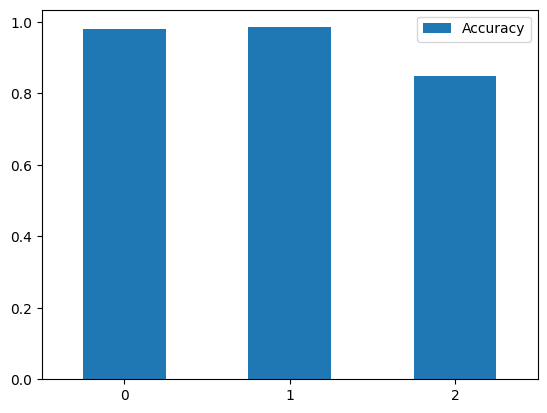

In [ ]:
%matplotlib inline
df.plot.bar(rot = 0)